RMSE on historical data: 0.08526021407847179
R-squared on historical data: 0.9779189511104256


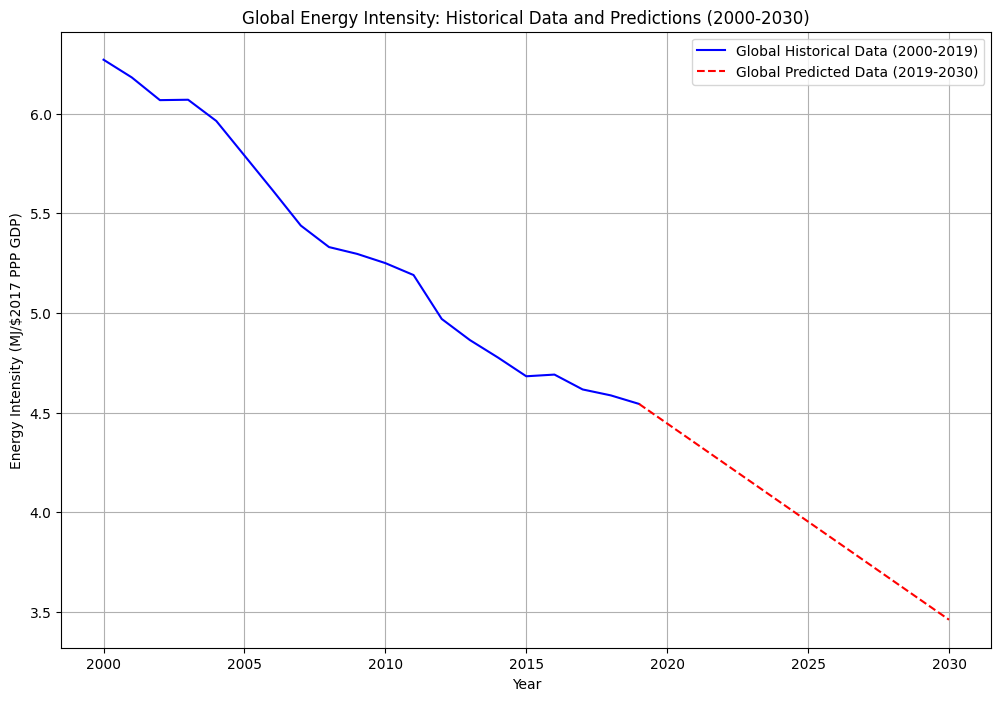

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('data/global-data-on-sustainable-energy.csv')

df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'] = df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean())

df_global = df[(df['Year'] >= 2000) & (df['Year'] <= 2019)].groupby('Year')['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean().reset_index()

X = df_global[['Year']]  
y = df_global['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']

model = LinearRegression()
model.fit(X, y)

future_years = pd.DataFrame({'Year': np.arange(2019, 2031)})
y_pred_future = model.predict(future_years)

last_actual_value = y.iloc[-1]
y_pred_future = y_pred_future - y_pred_future[0] + last_actual_value

y_pred_train = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred_train))
r2 = r2_score(y, y_pred_train)

print(f"RMSE on historical data: {rmse}")
print(f"R-squared on historical data: {r2}")

plt.figure(figsize=(12, 8))

plt.plot(df_global['Year'], y, label='Global Historical Data (2000-2019)', color='blue', linestyle='-')

plt.plot(future_years['Year'], y_pred_future, label='Global Predicted Data (2019-2030)', color='red', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Energy Intensity (MJ/$2017 PPP GDP)')
plt.title('Global Energy Intensity: Historical Data and Predictions (2000-2030)')
plt.legend()
plt.grid(True)

plt.show()


RMSE on historical data: 0.06489456243288605
R-squared on historical data: 0.9921187012023479


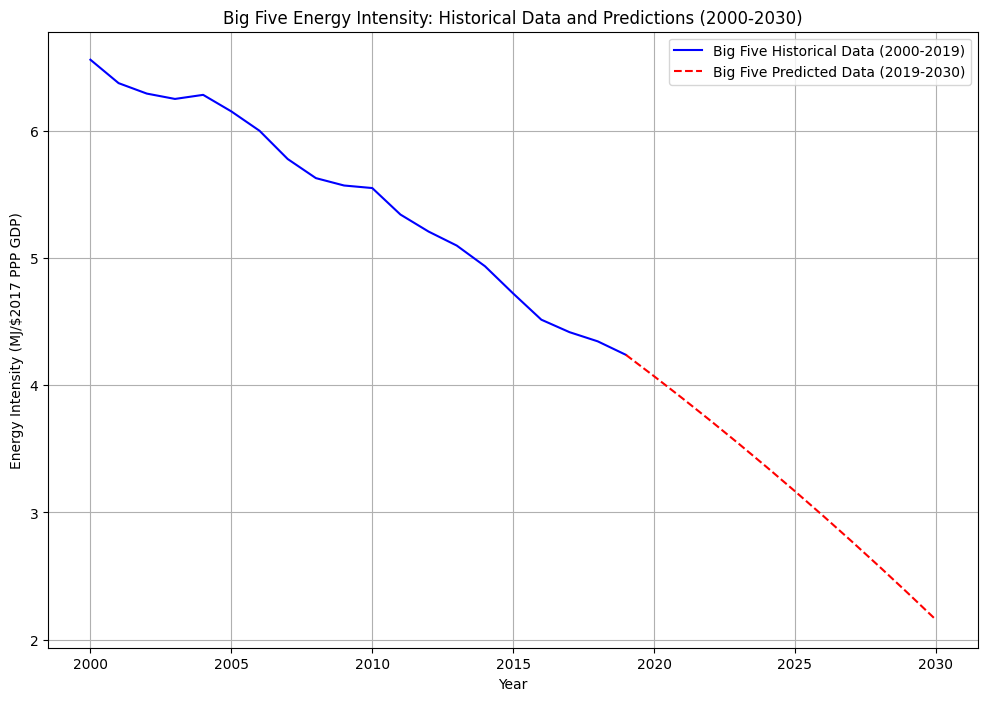

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('data/top_5_countries.csv')

df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'] = df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean())

df_bigfive = df[(df['Year'] >= 2000) & (df['Year'] <= 2019)].groupby('Year')['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean().reset_index()

X = df_bigfive[['Year']]  
y = df_bigfive['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']

degree = 2
polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polynomial_model.fit(X, y)

future_years = pd.DataFrame({'Year': np.arange(2019, 2031)})
y_pred_future = polynomial_model.predict(future_years)

last_actual_value = y.iloc[-1]
y_pred_future = y_pred_future - y_pred_future[0] + last_actual_value

y_pred_train = polynomial_model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred_train))
r2 = r2_score(y, y_pred_train)

print(f"RMSE on historical data: {rmse}")
print(f"R-squared on historical data: {r2}")

df_combined = pd.concat([
    df_bigfive, 
    pd.DataFrame({'Year': future_years['Year'], 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': y_pred_future})
]).reset_index(drop=True)

df_combined.to_csv('big_five_energy_intensity_historical_predicted.csv', index=False)

df_bigfive.to_csv('big_five_energy_intensity_historical.csv', index=False)
pd.DataFrame({'Year': future_years['Year'], 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': y_pred_future}).to_csv('big_five_energy_intensity_predicted.csv', index=False)

plt.figure(figsize=(12, 8))

plt.plot(df_bigfive['Year'], y, label='Big Five Historical Data (2000-2019)', color='blue', linestyle='-')
plt.plot(future_years['Year'], y_pred_future, label='Big Five Predicted Data (2019-2030)', color='red', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Energy Intensity (MJ/$2017 PPP GDP)')
plt.title('Big Five Energy Intensity: Historical Data and Predictions (2000-2030)')
plt.legend()
plt.grid(True)

plt.show()


RMSE on historical data: 0.1266674253746393
R-squared on historical data: 0.9511351382465505


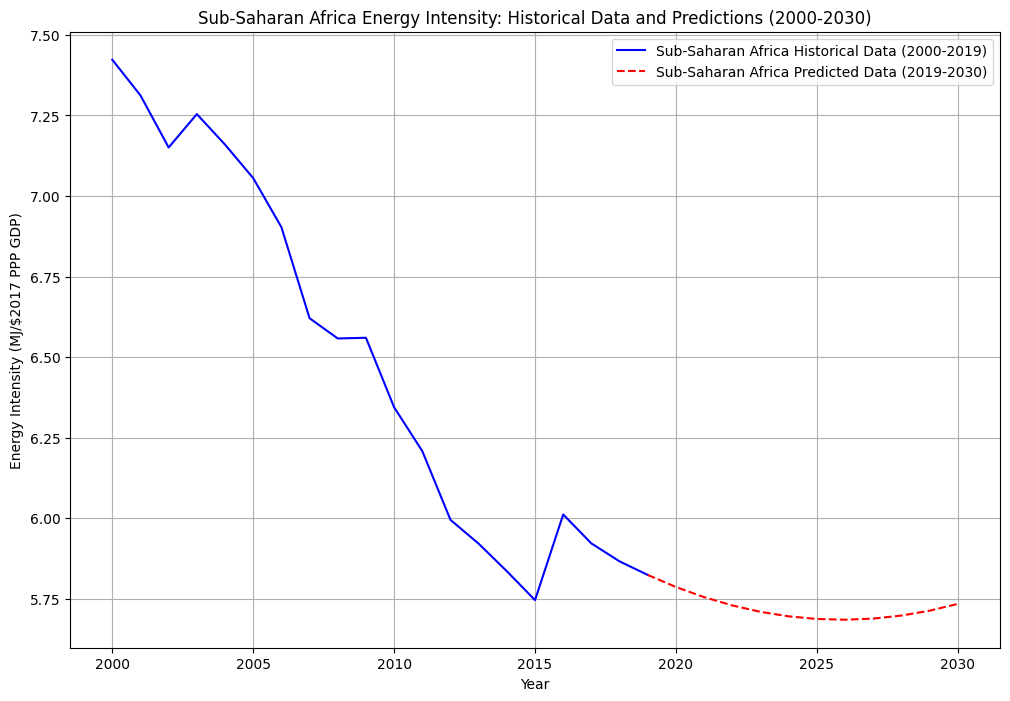

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('data/subsaharan-africa.csv')

df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'] = df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean())

df_africa = df[(df['Year'] >= 2000) & (df['Year'] <= 2019)].groupby('Year')['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean().reset_index()

X = df_africa[['Year']]  
y = df_africa['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']

degree = 2
polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polynomial_model.fit(X, y)

future_years = pd.DataFrame({'Year': np.arange(2019, 2031)})
y_pred_future = polynomial_model.predict(future_years)

last_actual_value = y.iloc[-1]
y_pred_future = y_pred_future - y_pred_future[0] + last_actual_value

y_pred_train = polynomial_model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred_train))
r2 = r2_score(y, y_pred_train)

print(f"RMSE on historical data: {rmse}")
print(f"R-squared on historical data: {r2}")

df_combined = pd.concat([
    df_africa, 
    pd.DataFrame({'Year': future_years['Year'], 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': y_pred_future})
]).reset_index(drop=True)

df_combined.to_csv('africa_energy_intensity_historical_predicted.csv', index=False)

df_africa.to_csv('africa_energy_intensity_historical.csv', index=False)
pd.DataFrame({'Year': future_years['Year'], 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': y_pred_future}).to_csv('africa_energy_intensity_predicted.csv', index=False)

plt.figure(figsize=(12, 8))

plt.plot(df_africa['Year'], y, label='Sub-Saharan Africa Historical Data (2000-2019)', color='blue', linestyle='-')
plt.plot(future_years['Year'], y_pred_future, label='Sub-Saharan Africa Predicted Data (2019-2030)', color='red', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Energy Intensity (MJ/$2017 PPP GDP)')
plt.title('Sub-Saharan Africa Energy Intensity: Historical Data and Predictions (2000-2030)')
plt.legend()
plt.grid(True)

plt.show()